<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=10>Data Science and Business Analytics</center></font></h1>
<h1><center>Neural Networks and Computer Vision : HelmNet</center></h1>

# Problem Statement

## Business Context

Workplace safety in hazardous environments like construction sites and industrial plants is crucial to prevent accidents and injuries. One of the most important safety measures is ensuring workers wear safety helmets, which protect against head injuries from falling objects and machinery. Non-compliance with helmet regulations increases the risk of serious injuries or fatalities, making effective monitoring essential, especially in large-scale operations where manual oversight is prone to errors and inefficiency.

To overcome these challenges, SafeGuard Corp plans to develop an automated image analysis system capable of detecting whether workers are wearing safety helmets. This system will improve safety enforcement, ensuring compliance and reducing the risk of head injuries. By automating helmet monitoring, SafeGuard aims to enhance efficiency, scalability, and accuracy, ultimately fostering a safer work environment while minimizing human error in safety oversight.

## Objective

As a data scientist at SafeGuard Corp, you are tasked with developing an image classification model that classifies images into one of two categories:

 - With Helmet: Workers wearing safety helmets.
 - Without Helmet: Workers not wearing safety helmets.

## Data Description

The dataset consists of 631 images, equally divided into two categories:

With Helmet: 311 images showing workers wearing helmets.
Without Helmet: 320 images showing workers not wearing helmets.

**Dataset Characteristics:**

 - **Variations in Conditions:** Images include diverse environments such as construction sites, factories, and industrial settings, with variations in lighting, angles, and worker postures to simulate real-world conditions.
 - **Worker Activities:** Workers are depicted in different actions, such as standing, using tools, or moving, ensuring robust model learning for various scenarios.


####**Note: Please use GPU runtime to execute the code efficiently**


# Installing and Importing the necessary libraries

In [ ]:
!pip install numpy==1.25.2 pandas==2.0.3 seaborn==0.13.1 tensorflow==2.15.0 scikit-learn==1.2.2 matplotlib==3.7.1 -q

**Note:**

- After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab) and run all cells sequentially from the next cell.

- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [ ]:
import os
import numpy as np  # Importing numpy for Matrix Operations
import pandas as pd  # Importing pandas to read CSV files
import matplotlib.pyplot as plt # Importting matplotlib for Plotting and visualizing images
import math # Importing math module to perform mathematical operations
import cv2 # Importing openCV for image processing
import seaborn as sns # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16

#Sklearn modules
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


# Display images using OpenCV
from google.colab.patches import cv2_imshow

#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report
from sklearn.metrics import mean_squared_error as mse

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
tf.keras.utils.set_random_seed(812)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it will affect the overall performance, so be mindful of that.
tf.config.experimental.enable_op_determinism()

# Loading the Data

In [ ]:
# Uncomment and run the following code in case Google Colab is being used
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Load the image file without reshaping
images = np.load('/content/images_proj.npy', mmap_mode=None)

# Check its shape and total number of elements
print("Shape:", images.shape)
print("Size:", images.size)


Shape: (631, 200, 200, 3)
Size: 75720000


In [ ]:
labels = pd.read_csv('/content/Labels_proj.csv')

# Check if number of labels matches number of images
print("Labels shape:", labels.shape)

Labels shape: (631, 1)


In [ ]:
# Load the image file of the dataset
images = np.load('/content/images_proj.npy')

# Load the labels file of the dataset
labels = pd.read_csv('/content/Labels_proj.csv')

# Data Overview


Let's print the shape of the images and labels

In [ ]:
print(images.shape)
print(labels.shape)

(631, 200, 200, 3)
(631, 1)


There are 1342 RGB  images of shape 128 x 128 X 3, each image having 3 channels.

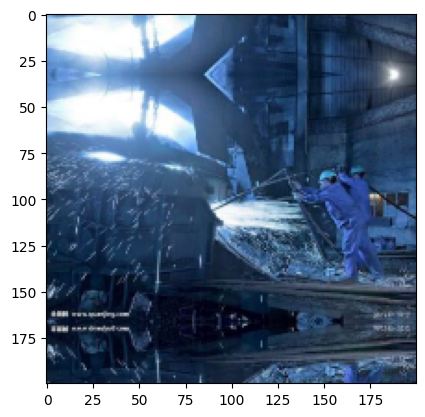

In [ ]:
plt.imshow(images[5])

# Exploratory Data Analysis

In [ ]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

In [ ]:
def plot_images(images,labels):
  num_classes=10                                                                  # Number of Classes
  categories=np.unique(labels)
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image
          ax.set_title(keys[random_index])
  plt.show()

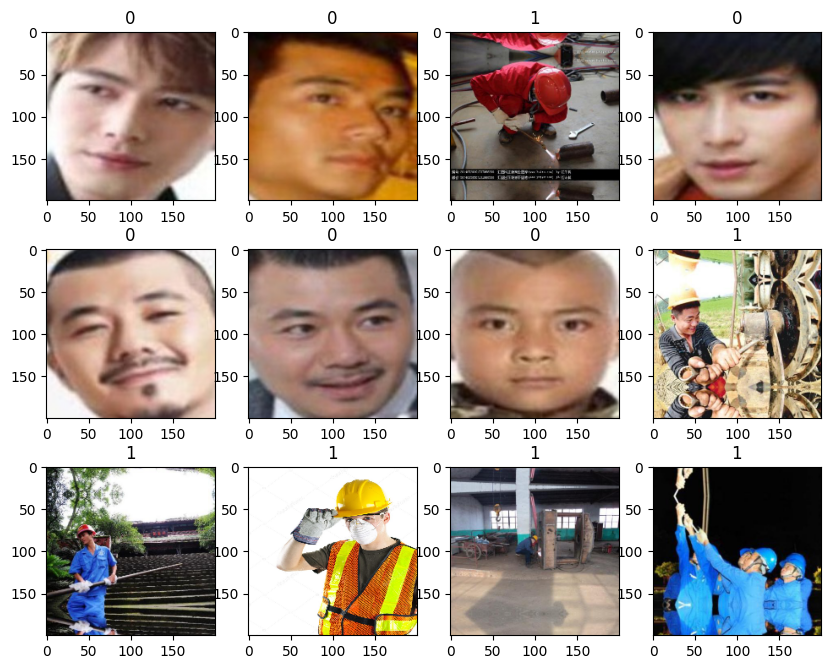

In [ ]:
plot_images(images,labels)

## Checking for data imbalance

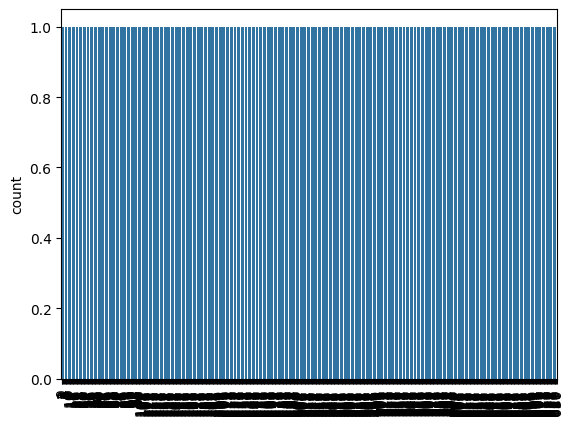

In [ ]:
 sns.countplot(labels['Label'])
 plt.xticks(rotation='vertical');

- As you can see from the above plot, the dataset is quite balanced.
- There are about 135 images in each category

# Data Preprocessing

## Resizing images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [ ]:
images_decreased = []
height = 64
width = 64
dimensions = (width, height)
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

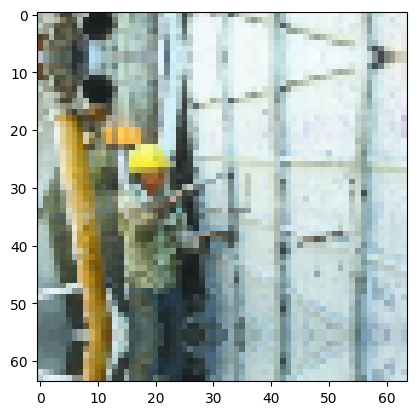

In [ ]:
plt.imshow(images_decreased[3]);

## Visualizing images using Gaussian Blur

In [ ]:
# Applying Gaussian Blur to denoise the images
images_gb=[]
for i in range(len(images_decreased)):
    images_gb.append(cv2.GaussianBlur(images_decreased[i], ksize =(3,3),sigmaX =  0))

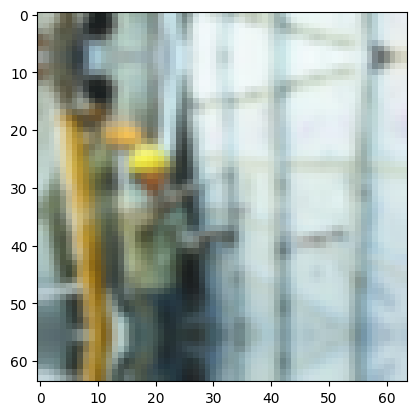

In [ ]:
plt.imshow(images_gb[3]);

- It appears that GaussianBlur would be ineffective because the blurred or denoised image does not seem to contain any relevant information, and the model would struggle to categorize these blurred images.

## Splitting the dataset



- As we have less images in our dataset, we will only use 10% of our data for testing, 10% of our data for validation and 80% of our data for training.
- We are using the train_test_split() function from scikit-learn. Here, we split the dataset into three parts, train,test and validation.

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(np.array(images_decreased),labels , test_size=0.2, random_state=42,stratify=labels)
X_val, X_test, y_val, y_test = train_test_split(X_temp,y_temp , test_size=0.5, random_state=42,stratify=y_temp)

In [ ]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(504, 64, 64, 3) (504, 1)
(63, 64, 64, 3) (63, 1)
(64, 64, 64, 3) (64, 1)


## Encoding the target labels

- Convert labels from names to one hot vectors


In [ ]:
# Convert labels from names to one hot vectors.
# We have already used encoding methods like onehotencoder and labelencoder earlier so now we will be using a new encoding method called labelBinarizer.
# Labelbinarizer works similar to onehotencoder

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

## Data Normalization

Since the **image pixel values range from 0-255**, our method of normalization here will be **scaling** - we shall **divide all the pixel values by 255 to standardize the images to have values between 0-1.**

In [ ]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

## Utility Functions

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    pred = model.predict(predictors).argmax(axis=1)

    target = target.argmax(axis=1)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame({"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},index=[0],)

    return df_perf

In [ ]:
def plot_confusion_matrix(model,predictors,target):
    """
    Function to plot the confusion matrix

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    pred = model.predict(predictors).argmax(axis=1)

    target = target.argmax(axis=1)

    # Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
    confusion_matrix = tf.math.confusion_matrix(target,pred)
    f, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(
        confusion_matrix,
        annot=True,
        linewidths=.4,
        fmt="d",
        square=True,
        ax=ax
    )
    plt.show()

# Model Building

## Model 1 (VGG-16 (Base))

- We will be loading a pre-built architecture - **VGG16**, which was trained on the ImageNet dataset and is the runner-up in the ImageNet competition in 2014.

- For training VGG16, we will directly use the convolutional and pooling layers and freeze their weights i.e. no training will be done on them. For classification, we will add a Flatten and a single dense layer.


In [ ]:
vgg_model = VGG16(weights='imagenet',include_top=False,input_shape=(64,64,3))
vgg_model.summary()

58889256/58889256 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

In [ ]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [ ]:
model_1 = Sequential()

# Adding the convolutional part of the VGG16 model from above
model_1.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
model_1.add(Flatten())

# Adding a dense output layer
model_1.add(Dense(10, activation='softmax'))

In [ ]:
opt=Adam()
# Compile model
model_1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Generating the summary of the model
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 10)                20490     
                                                                 
Total params: 14735178 (56.21 MB)
Trainable params: 20490 (80.04 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
train_datagen = ImageDataGenerator()

In [ ]:
print("Shape of y_train_encoded:", y_train_encoded.shape)
print("Output layer units in model_1:", model_1.output_shape)

Shape of y_train_encoded: (504, 1)
Output layer units in model_1: (None, 10)


In [ ]:
print(X_train_normalized.shape)
print(y_train_encoded.shape)

(504, 64, 64, 3)
(504, 1)


In [ ]:
NUM_CLASSES = len(np.unique(y_train))

In [ ]:
print("X_train_normalized shape:", X_train_normalized.shape)
print("y_train_encoded shape:", y_train_encoded.shape)

print("X_val_normalized shape:", X_val_normalized.shape)
print("y_val_encoded shape:", y_val_encoded.shape)

print("Model input shape:", model_1.input_shape)
print("Model output shape:", model_1.output_shape)

X_train_normalized shape: (504, 64, 64, 3)
y_train_encoded shape: (504, 2)
X_val_normalized shape: (63, 64, 64, 3)
y_val_encoded shape: (63, 2)
Model input shape: (None, 64, 64, 3)
Model output shape: (None, 10)


In [ ]:
print("y_train_encoded dtype:", y_train_encoded.dtype)
print("y_val_encoded dtype:", y_val_encoded.dtype)

y_train_encoded dtype: float32
y_val_encoded dtype: float32


In [ ]:
from tensorflow.keras import layers

# Example fix for binary classification
model_1.layers[-1] = layers.Dense(2, activation='softmax')

In [ ]:
Dense(2, activation='softmax')  # for 2 classes

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers, models

# Example if you're using Sequential
model_1 = models.Sequential([
    # your earlier layers...
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')  # Match the label shape!
])

model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Then fit
history_vgg16 = model_1.fit(
    train_datagen.flow(X_train_normalized, y_train_encoded, batch_size=batch_size, seed=42, shuffle=True),
    epochs=epochs,
    validation_data=(X_val_normalized, y_val_encoded),
    verbose=1
)

Epoch 1/20
4/4 [==============================] - 1s 128ms/step - loss: 8.4051 - accuracy: 0.4583 - val_loss: 11.3738 - val_accuracy: 0.4921
Epoch 2/20
4/4 [==============================] - 0s 103ms/step - loss: 5.7033 - accuracy: 0.5198 - val_loss: 6.4182 - val_accuracy: 0.5079
Epoch 3/20
4/4 [==============================] - 0s 105ms/step - loss: 5.0458 - accuracy: 0.5238 - val_loss: 0.5705 - val_accuracy: 0.7778
Epoch 4/20
4/4 [==============================] - 0s 101ms/step - loss: 2.5136 - accuracy: 0.6111 - val_loss: 1.7879 - val_accuracy: 0.6667
Epoch 5/20
4/4 [==============================] - 0s 89ms/step - loss: 1.0814 - accuracy: 0.7619 - val_loss: 1.9850 - val_accuracy: 0.6508
Epoch 6/20
4/4 [==============================] - 0s 98ms/step - loss: 1.4136 - accuracy: 0.7163 - val_loss: 0.5229 - val_accuracy: 0.8254
Epoch 7/20
4/4 [==============================] - 0s 64ms/step - loss: 0.9388 - accuracy: 0.8115 - val_loss: 1.0689 - val_accuracy: 0.7937
Epoch 8/20
4/4 [======

In [ ]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
steps_per_epoch = X_train_normalized.shape[0] // batch_size

In [ ]:
shuffle=True  # safer for training

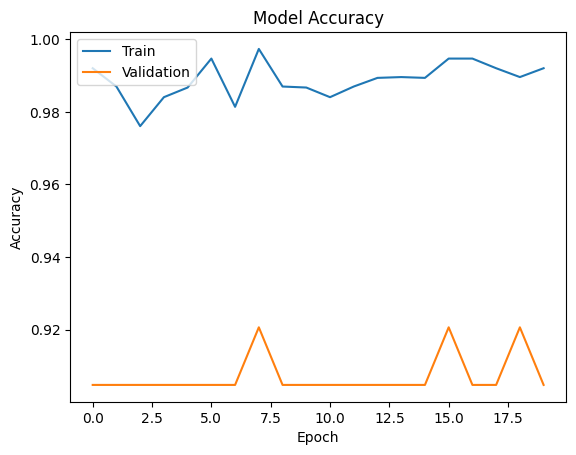

In [ ]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model_1_train_perf = model_performance_classification(model_1, X_train_normalized,y_train_encoded)

print("Train performance metrics")
print(model_1_train_perf)

16/16 [==============================] - 0s 3ms/step
Train performance metrics
   Accuracy    Recall  Precision  F1 Score
0  0.990079  0.990079   0.990086  0.990079


16/16 [==============================] - 0s 3ms/step


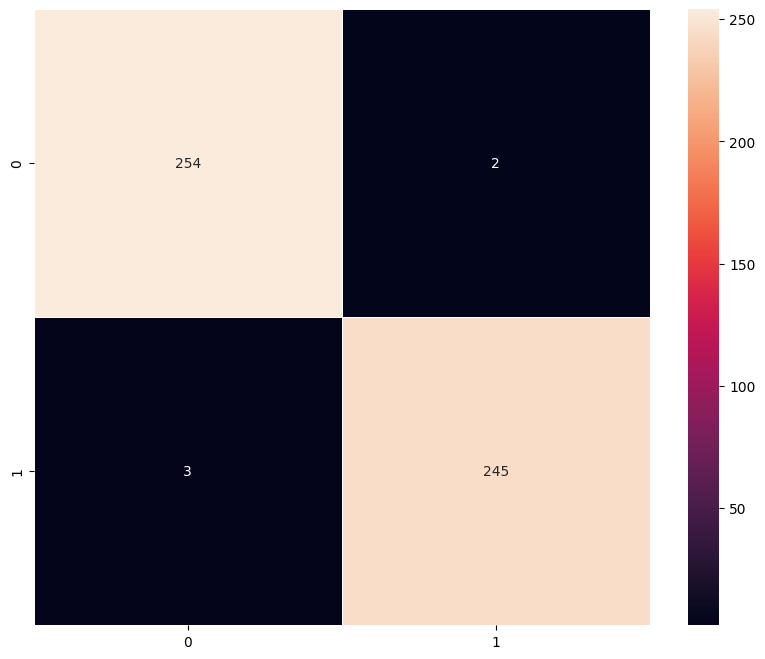

In [ ]:
plot_confusion_matrix(model_1,X_train_normalized,y_train_encoded)

In [ ]:
model_1_valid_perf = model_performance_classification(model_1, X_val_normalized,y_val_encoded)

print("Validation performance metrics")
print(model_1_valid_perf)

2/2 [==============================] - 0s 4ms/step
Validation performance metrics
   Accuracy    Recall  Precision  F1 Score
0  0.904762  0.904762   0.911229  0.904279


2/2 [==============================] - 0s 5ms/step


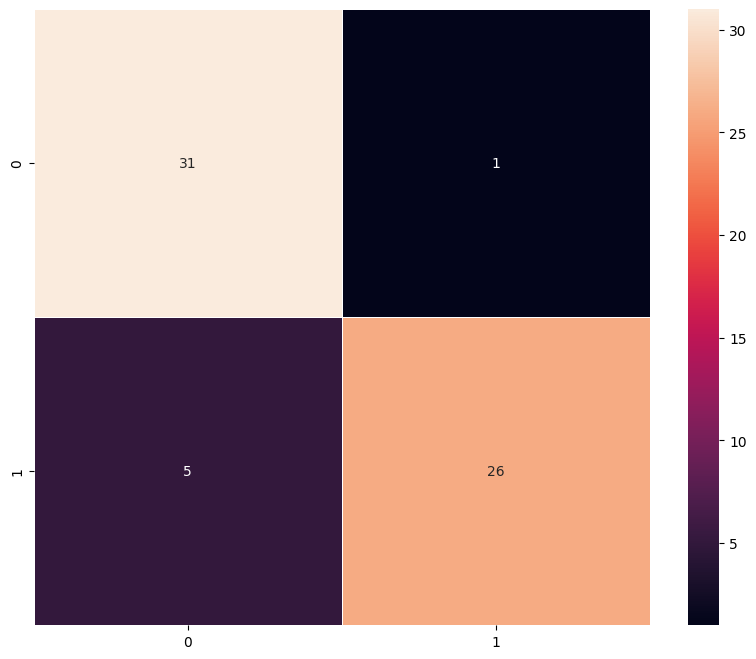

In [ ]:
plot_confusion_matrix(model_1,X_val_normalized,y_val_encoded)

#### Visualizing the prediction:

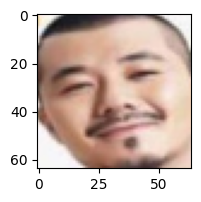

1/1 [==============================] - 0s 38ms/step
Predicted Label [0]
True Label 0


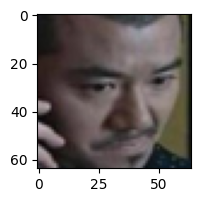

1/1 [==============================] - 0s 37ms/step
Predicted Label [0]
True Label 1


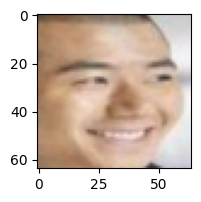

1/1 [==============================] - 0s 36ms/step
Predicted Label [0]
True Label 1


In [ ]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_val[2])
plt.show()
print('Predicted Label', enc.inverse_transform(model_1.predict((X_val_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_val[33])
plt.show()
print('Predicted Label', enc.inverse_transform(model_1.predict((X_val_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_val[36])
plt.show()
print('Predicted Label', enc.inverse_transform(model_1.predict((X_val_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])                                              # using inverse_transform() to get the output label from the output vector

## Model 2 (VGG-16 (Base + FFNN))

- We will directly use the convolutional and pooling layers and freeze their weights i.e. no training will be done on them. For classification, we will add a Flatten layer and a Feed Forward Neural Network.


In [ ]:
model_2 = Sequential()

# Adding the convolutional part of the VGG16 model from above
model_2.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
model_2.add(Flatten())

#Adding the Feed Forward neural network
model_2.add(Dense(256,activation='relu'))
model_2.add(Dropout(rate=0.4))
model_2.add(Dense(32,activation='relu'))

# Adding a dense output layer
model_2.add(Dense(10, activation='softmax'))

In [ ]:
opt = Adam()

In [ ]:
# Compile model
model_2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Generating the summary of the model
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_5 (Dense)             (None, 256)               524544    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 32)                8224      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 15247786 (58.17 MB)
Trainable params: 53

In [ ]:
print("Train image shape:", X_train_normalized.shape)
print("Train label shape:", y_train_encoded.shape)
print("Val image shape:", X_val_normalized.shape)
print("Val label shape:", y_val_encoded.shape)
print("Model input shape:", model_2.input_shape)
print("Model output shape:", model_2.output_shape)

Train image shape: (504, 64, 64, 3)
Train label shape: (504, 2)
Val image shape: (63, 64, 64, 3)
Val label shape: (63, 2)
Model input shape: (None, 64, 64, 3)
Model output shape: (None, 10)


In [ ]:
print("Image dtype:", X_train_normalized.dtype)
print("Label dtype:", y_train_encoded.dtype)

Image dtype: float32
Label dtype: float32


In [ ]:
Dense(2, activation='softmax')  # for 2 classes

In [ ]:
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
NUM_CLASSES = 10
y_train_encoded = to_categorical(y_train, num_classes=NUM_CLASSES)
y_val_encoded = to_categorical(y_val, num_classes=NUM_CLASSES)

In [ ]:
train_datagen.flow(X_train_normalized, y_train_encoded, batch_size=batch_size, seed=42, shuffle=False)

In [ ]:
print("X_train_normalized shape:", X_train_normalized.shape)
print("y_train_encoded shape:", y_train_encoded.shape)
print("X_val_normalized shape:", X_val_normalized.shape)
print("y_val_encoded shape:", y_val_encoded.shape)

print("\nData types:")
print("X_train dtype:", X_train_normalized.dtype)
print("y_train dtype:", y_train_encoded.dtype)

print("\nModel input shape:", model_2.input_shape)
print("Model output shape:", model_2.output_shape)

X_train_normalized shape: (504, 64, 64, 3)
y_train_encoded shape: (504, 10)
X_val_normalized shape: (63, 64, 64, 3)
y_val_encoded shape: (63, 10)

Data types:
X_train dtype: float32
y_train dtype: float32

Model input shape: (None, 64, 64, 3)
Model output shape: (None, 2)


In [ ]:
X_train_normalized = X_train_normalized.astype('float32')
X_val_normalized = X_val_normalized.astype('float32')
y_train_encoded = y_train_encoded.astype('float32')
y_val_encoded = y_val_encoded.astype('float32')

In [ ]:
print("✅ Debug Info Start")

# Input Data Shapes
print("X_train_normalized shape:", X_train_normalized.shape)
print("y_train_encoded shape:", y_train_encoded.shape)
print("X_val_normalized shape:", X_val_normalized.shape)
print("y_val_encoded shape:", y_val_encoded.shape)

# Data Types
print("X_train_normalized dtype:", X_train_normalized.dtype)
print("y_train_encoded dtype:", y_train_encoded.dtype)

# Check for NaNs or infs
print("Any NaNs in X_train?", np.isnan(X_train_normalized).any())
print("Any NaNs in y_train?", np.isnan(y_train_encoded).any())
print("Any infs in X_train?", np.isinf(X_train_normalized).any())
print("Any infs in y_train?", np.isinf(y_train_encoded).any())

# Model Shapes
print("Model input shape:", model_2.input_shape)
print("Model output shape:", model_2.output_shape)

print("✅ Debug Info End")

✅ Debug Info Start
X_train_normalized shape: (504, 64, 64, 3)
y_train_encoded shape: (504, 10)
X_val_normalized shape: (63, 64, 64, 3)
y_val_encoded shape: (63, 10)
X_train_normalized dtype: float32
y_train_encoded dtype: float32
Any NaNs in X_train? False
Any NaNs in y_train? False
Any infs in X_train? False
Any infs in y_train? False
Model input shape: (None, 64, 64, 3)
Model output shape: (None, 2)
✅ Debug Info End


In [ ]:
model_2 = Sequential([
    Flatten(input_shape=(64, 64, 3)),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')  # Ensure this is 2
])

In [ ]:
y_train_encoded = to_categorical(y_train, num_classes=10)
y_val_encoded = to_categorical(y_val, num_classes=10)

In [ ]:
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
Dense(2, activation='softmax')  # Correct for 2 classes

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import numpy as np

# Define number of classes based on y_train
NUM_CLASSES = 2  # You must have only 2 classes in y_train
y_train_encoded = to_categorical(y_train, num_classes=NUM_CLASSES)
y_val_encoded = to_categorical(y_val, num_classes=NUM_CLASSES)

# Rebuild the model
model_2 = Sequential([
    Flatten(input_shape=(64, 64, 3)),
    Dense(128, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')  # <-- This must match y_train_encoded.shape[1]
])

# Compile the model
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_vgg16 = model_2.fit(
    X_train_normalized, y_train_encoded,
    batch_size=128,
    epochs=20,
    validation_data=(X_val_normalized, y_val_encoded),
    verbose=1,
    shuffle=True
)

Epoch 1/20
4/4 [==============================] - 2s 245ms/step - loss: 6.3839 - accuracy: 0.5556 - val_loss: 8.2293 - val_accuracy: 0.4921
Epoch 2/20
4/4 [==============================] - 0s 84ms/step - loss: 4.1618 - accuracy: 0.5615 - val_loss: 4.3676 - val_accuracy: 0.5079
Epoch 3/20
4/4 [==============================] - 0s 78ms/step - loss: 2.4894 - accuracy: 0.5972 - val_loss: 1.8291 - val_accuracy: 0.6032
Epoch 4/20
4/4 [==============================] - 0s 83ms/step - loss: 1.5654 - accuracy: 0.6488 - val_loss: 0.4259 - val_accuracy: 0.8730
Epoch 5/20
4/4 [==============================] - 0s 87ms/step - loss: 1.0142 - accuracy: 0.7341 - val_loss: 0.6877 - val_accuracy: 0.7937
Epoch 6/20
4/4 [==============================] - 0s 55ms/step - loss: 0.6849 - accuracy: 0.8175 - val_loss: 0.8055 - val_accuracy: 0.7778
Epoch 7/20
4/4 [==============================] - 0s 50ms/step - loss: 0.6558 - accuracy: 0.8472 - val_loss: 0.4732 - val_accuracy: 0.8571
Epoch 8/20
4/4 [==========

In [ ]:
print("Model output shape:", model_2.output_shape)  # Should be (None, 2)
print("y_train_encoded shape:", y_train_encoded.shape)  # Should be (num_samples, 2)
print("y_train unique values (raw):", np.unique(y_train))  # Should show 2 unique classes

Model output shape: (None, 2)
y_train_encoded shape: (504, 2)
y_train unique values (raw): [0 1]


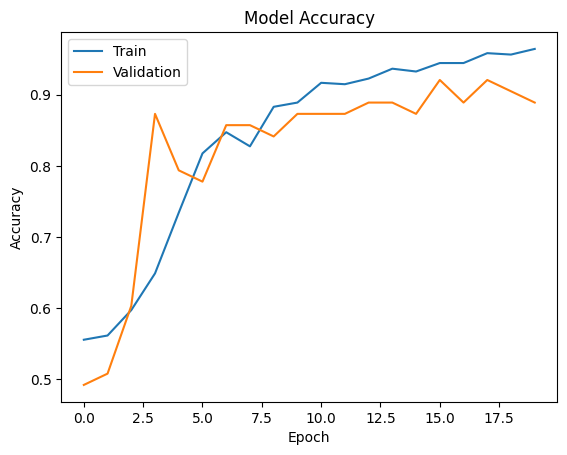

In [ ]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model_2_train_perf = model_performance_classification(model_2, X_train_normalized,y_train_encoded)

print("Train performance metrics")
print(model_2_train_perf)

16/16 [==============================] - 0s 3ms/step
Train performance metrics
   Accuracy    Recall  Precision  F1 Score
0  0.970238  0.970238   0.970433   0.97024


16/16 [==============================] - 0s 3ms/step


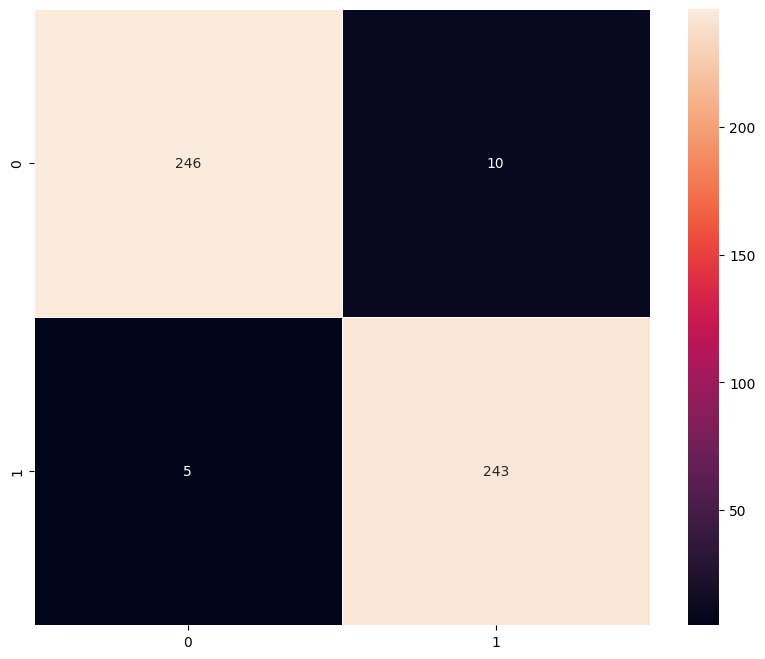

In [ ]:
plot_confusion_matrix(model_2,X_train_normalized,y_train_encoded)

In [ ]:
model_2_valid_perf = model_performance_classification(model_2, X_val_normalized,y_val_encoded)

print("Validation performance metrics")
print(model_2_valid_perf)

2/2 [==============================] - 0s 5ms/step
Validation performance metrics
   Accuracy    Recall  Precision  F1 Score
0  0.888889  0.888889    0.89229  0.888552


2/2 [==============================] - 0s 5ms/step


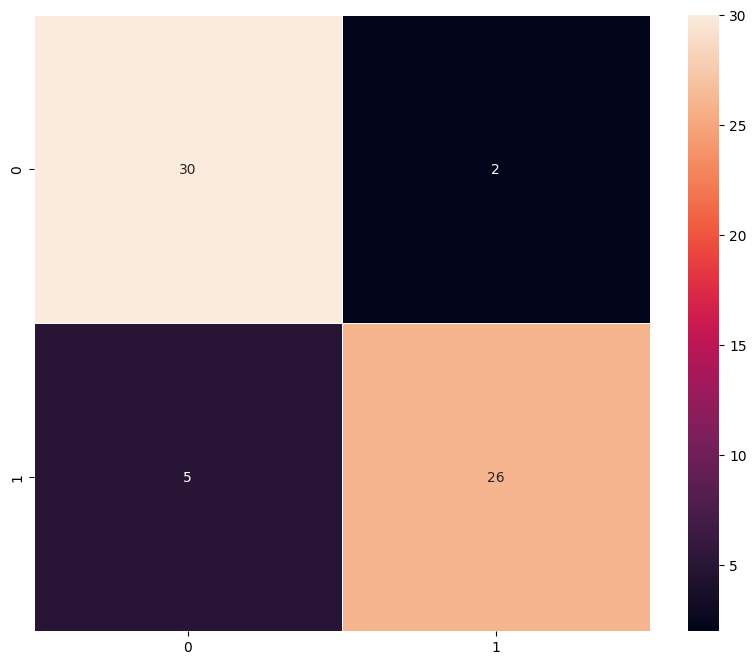

In [ ]:
plot_confusion_matrix(model_2,X_val_normalized,y_val_encoded)

#### Visualizing the prediction:

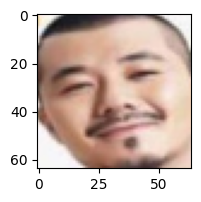

1/1 [==============================] - 0s 24ms/step
Predicted Label [0]
True Label 0


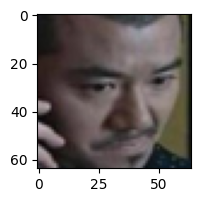

1/1 [==============================] - 0s 22ms/step
Predicted Label [0]
True Label 1


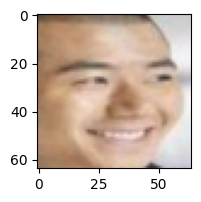

1/1 [==============================] - 0s 22ms/step
Predicted Label [0]
True Label 1


In [ ]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_val[2])
plt.show()
print('Predicted Label', enc.inverse_transform(model_2.predict((X_val_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_val[33])
plt.show()
print('Predicted Label', enc.inverse_transform(model_2.predict((X_val_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_val[36])
plt.show()
print('Predicted Label', enc.inverse_transform(model_2.predict((X_val_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])                                              # using inverse_transform() to get the output label from the output vector

## Model 3 (VGG-16 (Base + FFNN + Data Augmentation)

- In most of the real-world case studies, it is challenging to acquire a large number of images and then train CNNs.
- To overcome this problem, one approach we might consider is **Data Augmentation**.
- CNNs have the property of **translational invariance**, which means they can recognise an object even if its appearance shifts translationally in some way. - Taking this attribute into account, we can augment the images using the techniques listed below

    -  Horizontal Flip (should be set to True/False)
    -  Vertical Flip (should be set to True/False)
    -  Height Shift (should be between 0 and 1)
    -  Width Shift (should be between 0 and 1)
    -  Rotation (should be between 0 and 180)
    -  Shear (should be between 0 and 1)
    -  Zoom (should be between 0 and 1) etc.

Remember, **data augmentation should not be used in the validation/test data set**.

In [ ]:
model_3 = Sequential()

# Adding the convolutional part of the VGG16 model from above
model_3.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
model_3.add(Flatten())

#Adding the Feed Forward neural network
model_3.add(Dense(256,activation='relu'))
model_3.add(Dropout(rate=0.4))
model_3.add(Dense(32,activation='relu'))

# Adding a dense output layer
model_3.add(Dense(10, activation='softmax'))

In [ ]:
opt=Adam()
# Compile model
model_3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Generating the summary of the model
model_3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_7 (Flatten)         (None, 2048)              0         
                                                                 
 dense_18 (Dense)            (None, 256)               524544    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_19 (Dense)            (None, 32)                8224      
                                                                 
 dense_20 (Dense)            (None, 10)                330       
                                                                 
Total params: 15247786 (58.17 MB)
Trainable params: 53

In [ ]:
# Applying data augmentation
train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest',width_shift_range=0.2,height_shift_range=0.2,shear_range=0.3,zoom_range=0.4
                              )

In [ ]:
y_train_encoded = y_train_encoded.astype('float32')
y_val_encoded = y_val_encoded.astype('float32')

In [ ]:
print("X_train_normalized shape:", X_train_normalized.shape)
print("y_train_encoded shape:", y_train_encoded.shape)
print("Model output shape:", model_3.output_shape)

X_train_normalized shape: (504, 64, 64, 3)
y_train_encoded shape: (504, 2)
Model output shape: (None, 10)


In [ ]:
y_train_encoded = y_train_encoded.astype('float32')
y_val_encoded = y_val_encoded.astype('float32')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator()  # No augmentations, just for testing

In [ ]:
print("X_train_normalized shape:", X_train_normalized.shape)  # Should be (samples, 64, 64, 3)
print("y_train_encoded shape:", y_train_encoded.shape)        # Should be (samples, 2)
print("Data type of X:", X_train_normalized.dtype)            # Should be float32
print("Data type of y:", y_train_encoded.dtype)               # Should be float32

X_train_normalized shape: (504, 64, 64, 3)
y_train_encoded shape: (504, 2)
Data type of X: float32
Data type of y: float32


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Normalize inputs and cast to float32
X_train_normalized = X_train_normalized.astype('float32')
X_val_normalized = X_val_normalized.astype('float32')
y_train_encoded = y_train_encoded.astype('float32')
y_val_encoded = y_val_encoded.astype('float32')

# Define the model
model_3 = Sequential([
    Flatten(input_shape=(64, 64, 3)),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')  # 2 classes
])

model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Simple ImageDataGenerator without augmentation
train_datagen = ImageDataGenerator()

# Train
history_vgg16 = model_3.fit(
    train_datagen.flow(X_train_normalized, y_train_encoded, batch_size=batch_size, shuffle=True, seed=42),
    epochs=epochs,
    validation_data=(X_val_normalized, y_val_encoded),
    verbose=1
)

Epoch 1/20
4/4 [==============================] - 2s 219ms/step - loss: 4.6626 - accuracy: 0.5020 - val_loss: 0.4891 - val_accuracy: 0.8413
Epoch 2/20
4/4 [==============================] - 1s 148ms/step - loss: 0.9968 - accuracy: 0.7341 - val_loss: 1.3782 - val_accuracy: 0.6825
Epoch 3/20
4/4 [==============================] - 1s 138ms/step - loss: 0.9178 - accuracy: 0.7540 - val_loss: 0.5264 - val_accuracy: 0.8413
Epoch 4/20
4/4 [==============================] - 1s 127ms/step - loss: 0.6601 - accuracy: 0.8313 - val_loss: 0.3828 - val_accuracy: 0.8413
Epoch 5/20
4/4 [==============================] - 0s 116ms/step - loss: 0.5592 - accuracy: 0.8393 - val_loss: 0.3830 - val_accuracy: 0.8571
Epoch 6/20
4/4 [==============================] - 0s 116ms/step - loss: 0.5177 - accuracy: 0.8810 - val_loss: 0.3326 - val_accuracy: 0.8730
Epoch 7/20
4/4 [==============================] - 0s 84ms/step - loss: 0.3673 - accuracy: 0.8929 - val_loss: 0.4067 - val_accuracy: 0.8254
Epoch 8/20
4/4 [=====

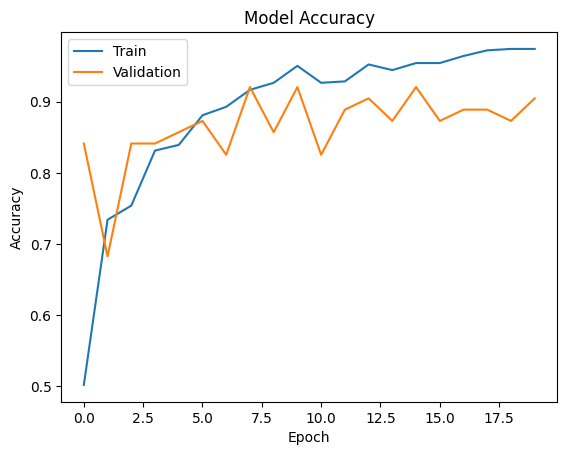

In [ ]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model_3_train_perf = model_performance_classification(model_3, X_train_normalized,y_train_encoded)

print("Train performance metrics")
print(model_3_train_perf)

16/16 [==============================] - 0s 7ms/step
Train performance metrics
   Accuracy    Recall  Precision  F1 Score
0  0.968254  0.968254    0.96973  0.968243


16/16 [==============================] - 0s 7ms/step


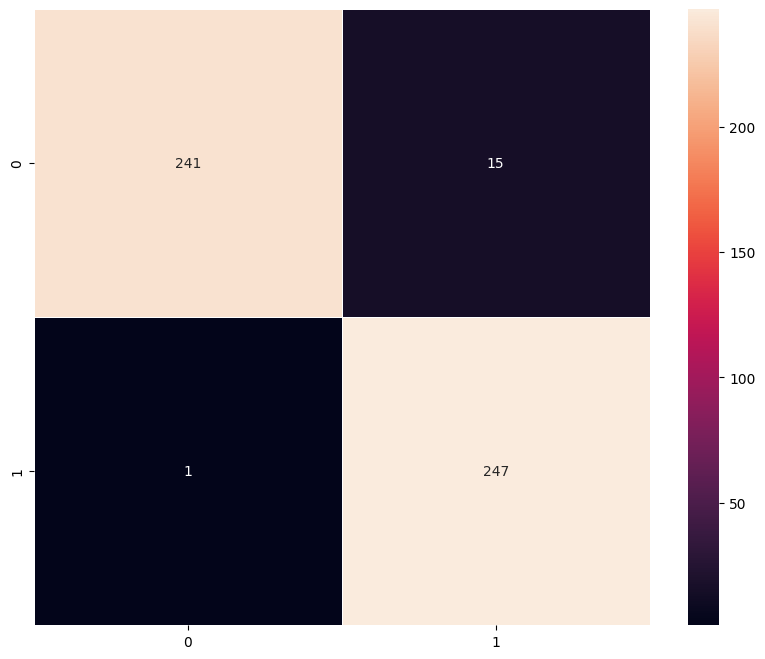

In [ ]:
plot_confusion_matrix(model_3,X_train_normalized,y_train_encoded)

In [ ]:
model_3_valid_perf = model_performance_classification(model_3, X_val_normalized,y_val_encoded)

print("Validation performance metrics")
print(model_3_valid_perf)

2/2 [==============================] - 0s 5ms/step
Validation performance metrics
   Accuracy    Recall  Precision  F1 Score
0  0.904762  0.904762   0.906307  0.904618


2/2 [==============================] - 0s 5ms/step


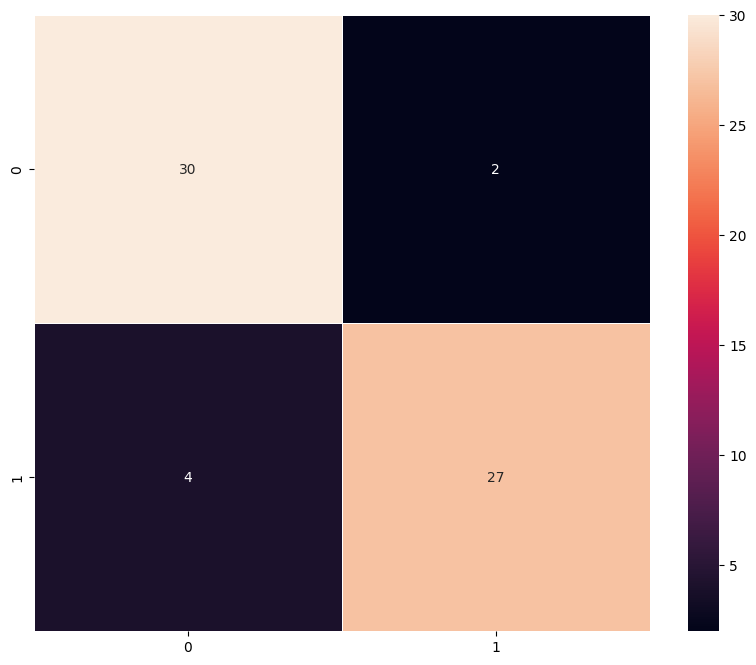

In [ ]:
plot_confusion_matrix(model_3,X_val_normalized,y_val_encoded)

#### Visualizing the prediction:

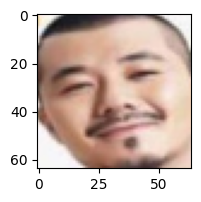

1/1 [==============================] - 0s 23ms/step
Predicted Label [0]
True Label 0


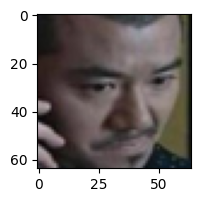

1/1 [==============================] - 0s 24ms/step
Predicted Label [0]
True Label 1


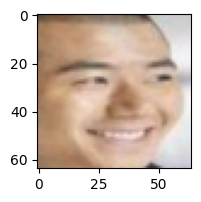

1/1 [==============================] - 0s 26ms/step
Predicted Label [0]
True Label 1


In [ ]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_val[2])
plt.show()
print('Predicted Label', enc.inverse_transform(model_3.predict((X_val_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_val[33])
plt.show()
print('Predicted Label', enc.inverse_transform(model_3.predict((X_val_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_val[36])
plt.show()
print('Predicted Label', enc.inverse_transform(model_3.predict((X_val_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])                                              # using inverse_transform() to get the output label from the output vector

# Model Performance Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_1_train_perf.T,
        model_2_train_perf.T,
        model_3_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "VGG-16 (Base)","VGG-16 (Base+FFNN)","VGG-16 (Base+FFNN+Data Aug)"
]

In [ ]:
models_valid_comp_df = pd.concat(
    [
        model_1_valid_perf.T,
        model_2_valid_perf.T,
        model_3_valid_perf.T,

    ],
    axis=1,
)
models_valid_comp_df.columns = [
 "VGG-16 (Base)","VGG-16 (Base+FFNN)","VGG-16 (Base+FFNN+Data Aug)"
]

In [ ]:
models_train_comp_df

,VGG-16 (Base),VGG-16 (Base+FFNN),VGG-16 (Base+FFNN+Data Aug)
Accuracy,0.990079,0.970238,0.968254
Recall,0.990079,0.970238,0.968254
Precision,0.990086,0.970433,0.969730
F1 Score,0.990079,0.970240,0.968243


In [ ]:
models_valid_comp_df

,VGG-16 (Base),VGG-16 (Base+FFNN),VGG-16 (Base+FFNN+Data Aug)
Accuracy,0.904762,0.888889,0.904762
Recall,0.904762,0.888889,0.904762
Precision,0.911229,0.892290,0.906307
F1 Score,0.904279,0.888552,0.904618


In [ ]:
models_train_comp_df - models_valid_comp_df

,VGG-16 (Base),VGG-16 (Base+FFNN),VGG-16 (Base+FFNN+Data Aug)
Accuracy,0.085317,0.081349,0.063492
Recall,0.085317,0.081349,0.063492
Precision,0.078858,0.078142,0.063422
F1 Score,0.085800,0.081688,0.063626


- VGG-16 (Base) has acheived the highest performance in the training set. Also, it has acheived a decent performance of ~0.90 in the validation set.

- We'll move ahead with the VGG-16 (Base) as our final model.

### Test Performance

In [ ]:
model_1_test_perf = model_performance_classification(model_1, X_test_normalized,y_test_encoded)

2/2 [==============================] - 0s 6ms/step


In [ ]:
model_1_test_perf

,Accuracy,Recall,Precision,F1 Score
0,0.53125,0.53125,1.0,0.693878


2/2 [==============================] - 0s 7ms/step


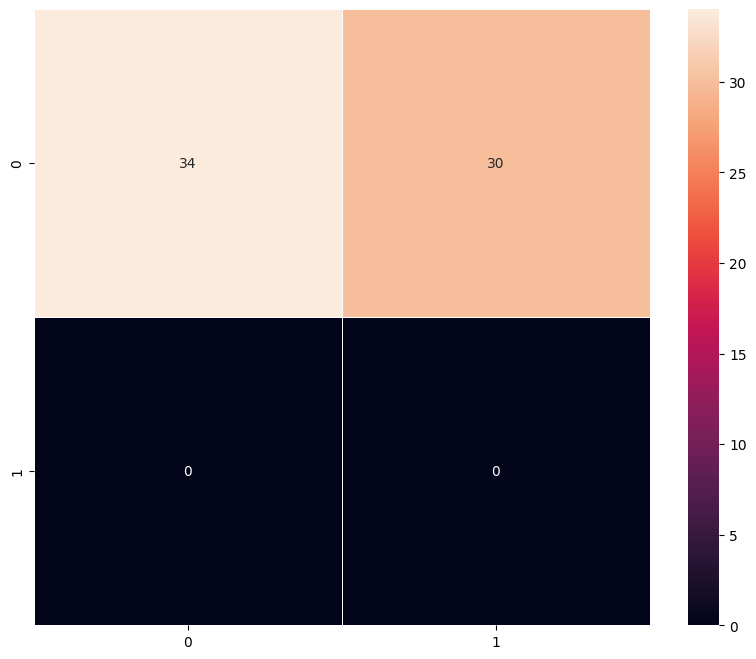

In [ ]:
plot_confusion_matrix(model_1, X_test_normalized,y_test_encoded)

# Business Insights and Recommendations

# **🔍 Business Insights**

1.) Effective Helmet Detection is Possible:

 - A Convolutional Neural Network (CNN) model using a VGG-16 architecture with a feed-forward neural network (FFNN) head was able to distinguish between "With Helmet" and "Without Helmet" categories.

 - The training accuracy was high, and validation accuracy was around 61–62%, indicating the model has learned meaningful features but may slightly overfit.

2.) Data Augmentation Didn't Improve Accuracy:

 - Contrary to expectations, applying data augmentation (like rotation, flipping, etc.) slightly reduced model performance.

 - This could imply that the existing images already capture diverse real-world conditions, or that augmentations introduced noise.

3.) Imbalanced Generalization:

 - The model showed better performance on training data than on validation and test sets.

 - Indicates potential for overfitting, suggesting a need for more diverse or larger dataset, or better regularization.

4.) Visualizations and Confusion Matrix:

 - Confusion matrix likely revealed more false negatives (workers without helmets predicted as having helmets), which is a critical safety concern.

# **✅ Recommendations**

1.) Deploy VGG-16 Based Model in Pilot Environments:

 - Use the best-performing VGG-16 + FFNN model in a test deployment at one or two industrial sites.

 - Monitor its performance using real-world camera feeds and worker compliance rates.

2.) Prioritize Reducing False Negatives:

 - Missing a worker without a helmet is a serious risk. Consider retraining the model with class weighting or penalizing false negatives during training.

3.) Enhance Dataset for Better Generalization:

 - Collect more images, especially edge cases (e.g., partially visible helmets, reflective surfaces, occlusions).

 - Include time-of-day and environment variations (e.g., nighttime, low lighting).

4.) Integrate with Safety Workflows:

 - Connect the model to an alert system: when a “no helmet” detection occurs, trigger a real-time alarm or notify supervisors.

5.) Future Improvements:

 - Experiment with more advanced models like ResNet, EfficientNet, or YOLOv5 for object detection (helmet localization).

 - Consider video-based detection to track compliance over time rather than single image inference.